In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 
warnings.filterwarnings('ignore')

df = pd.read_csv('../data/bank-full.csv', sep=';')
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [3]:
# Data Info

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [4]:
# Checking the shape of the data frame

df.shape

(45211, 17)

In [5]:
# Checking the null values

df.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

In [6]:
# Optional: Standardize column names

df.columns = df.columns.str.replace('.', '_').str.strip()

In [7]:
df.head(2)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no


# Data Visualisation

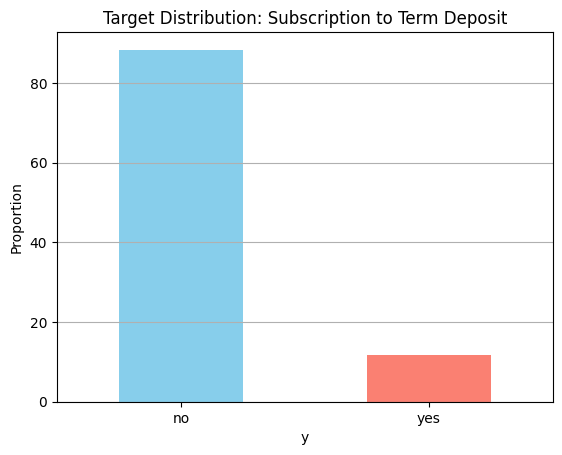

Percentage of values are
y
no     88.30152
yes    11.69848
Name: proportion, dtype: float64


In [8]:
# Value counts and plot

(df['y'].value_counts(normalize=True)*100).plot(kind='bar', color=['skyblue', 'salmon'])
plt.title('Target Distribution: Subscription to Term Deposit')
plt.ylabel('Proportion')
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.show()

print("Percentage of values are")
print(df['y'].value_counts(normalize=True)*100)

In [9]:
# List of categorical columns (excluding target)

categorical_cols = df.select_dtypes(include='object').columns.to_list()
categorical_cols.remove('y')
print(categorical_cols)

['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome']


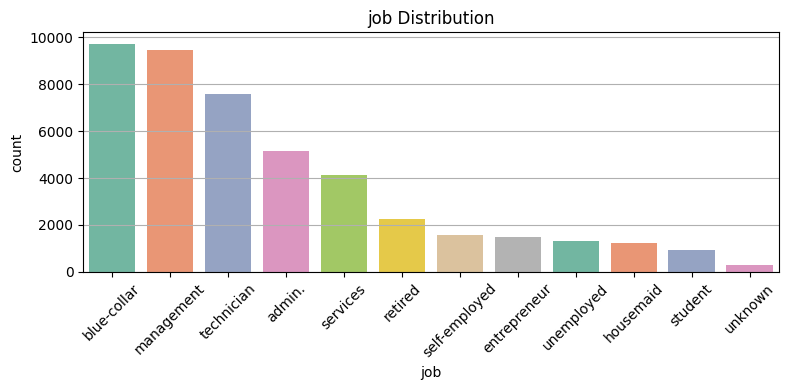

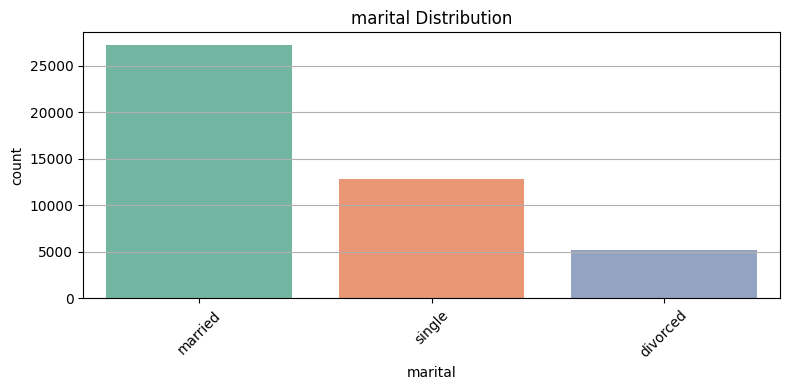

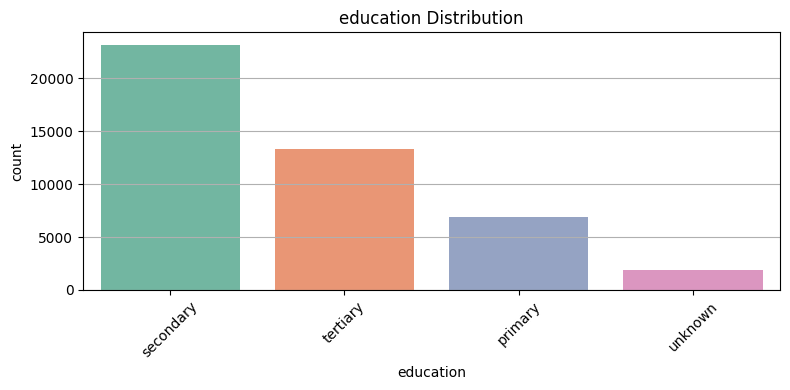

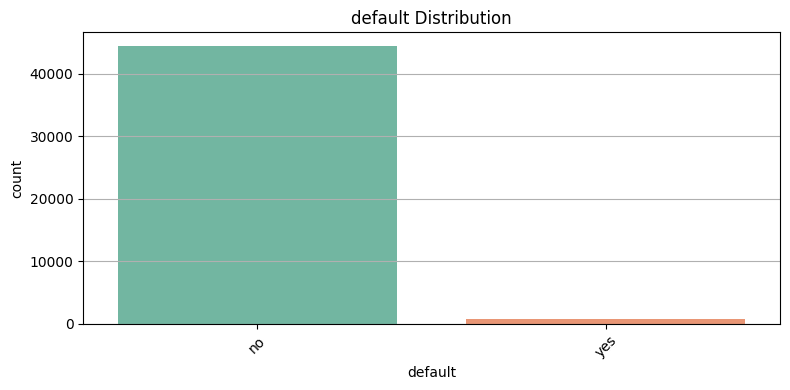

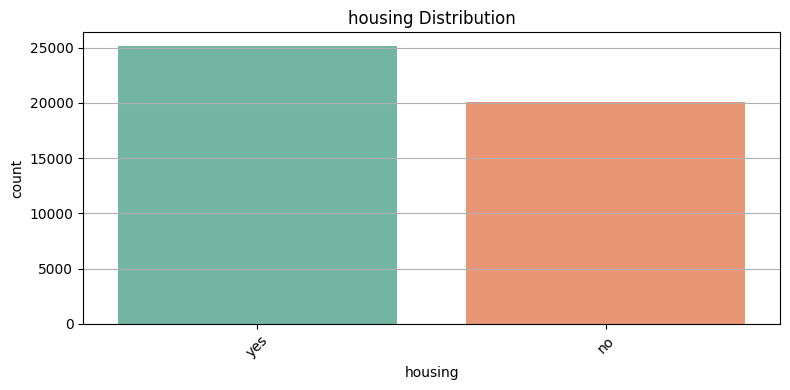

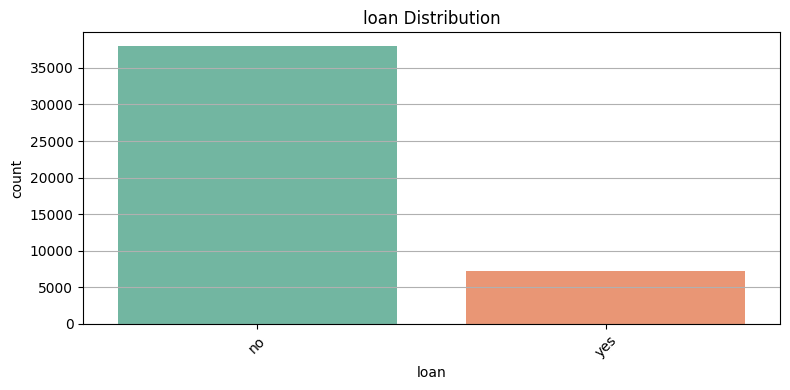

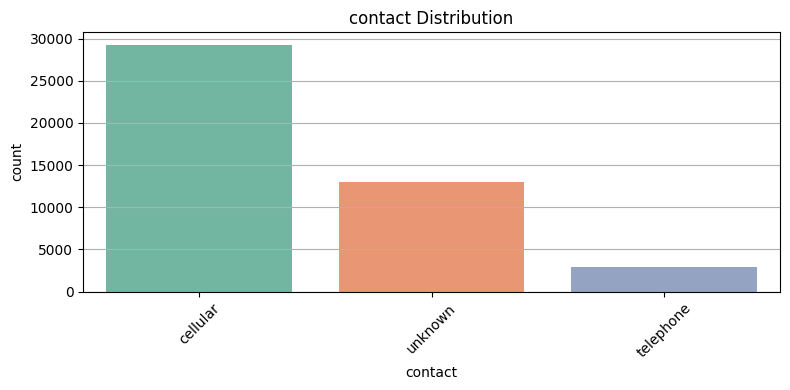

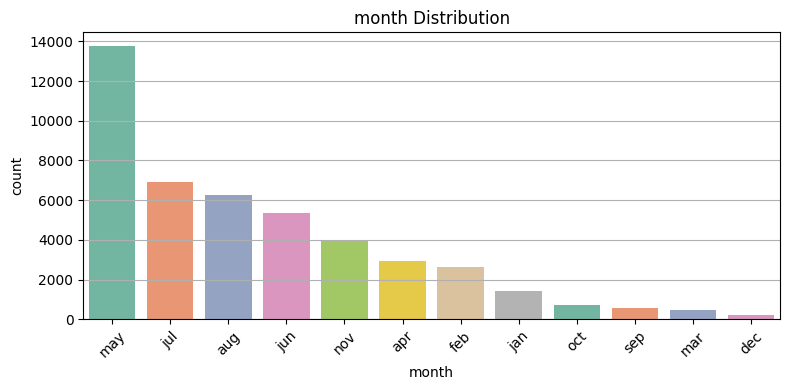

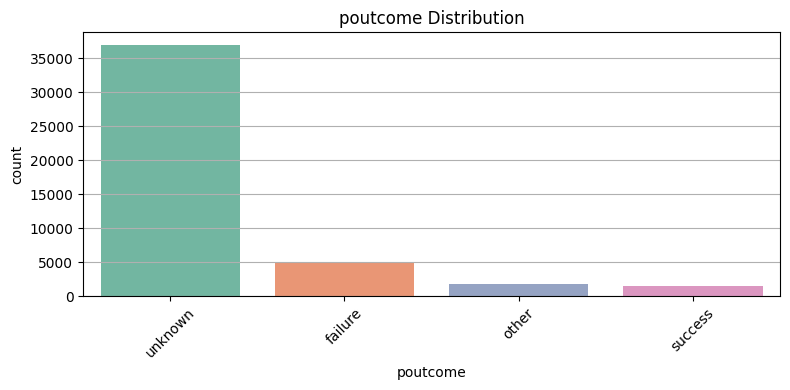

In [10]:
# Plot value counts for each

for col in categorical_cols:
    plt.figure(figsize=(8, 4))
    sns.countplot(data=df, x=col, order=df[col].value_counts().index, palette='Set2')
    plt.title(f'{col} Distribution')
    plt.xticks(rotation=45)
    plt.grid(axis='y')
    plt.tight_layout()
    plt.savefig(f'..\images\{col}_Distribution')
    plt.show()

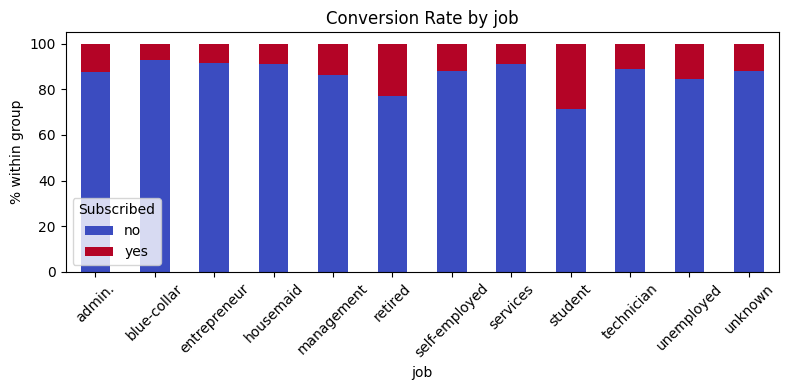

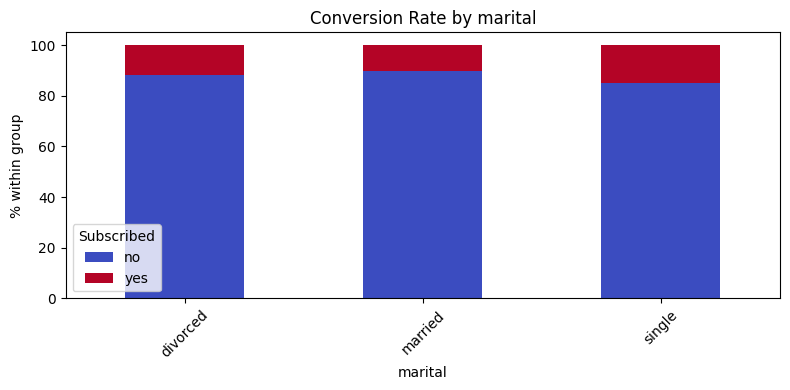

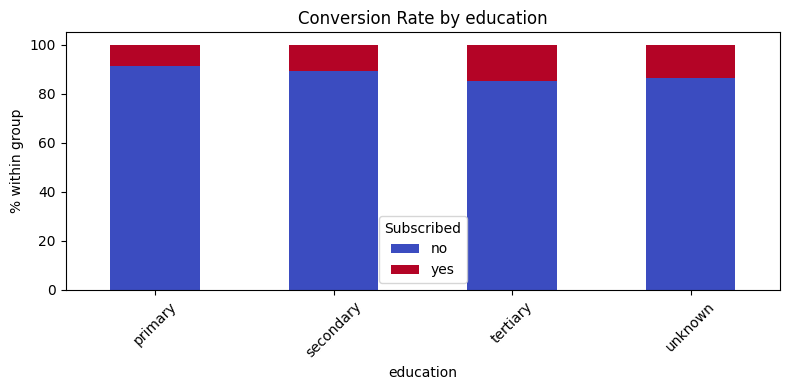

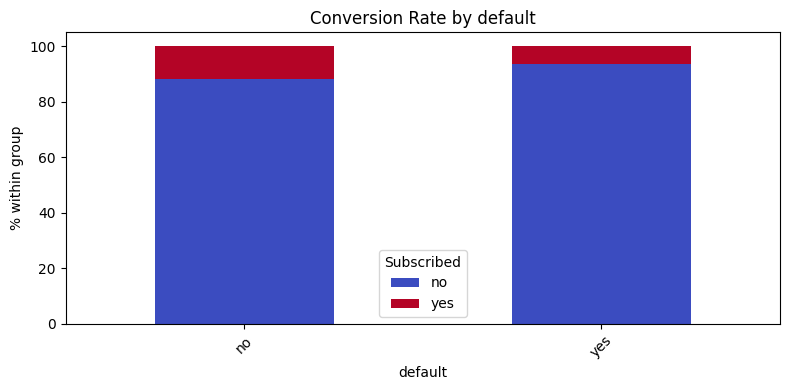

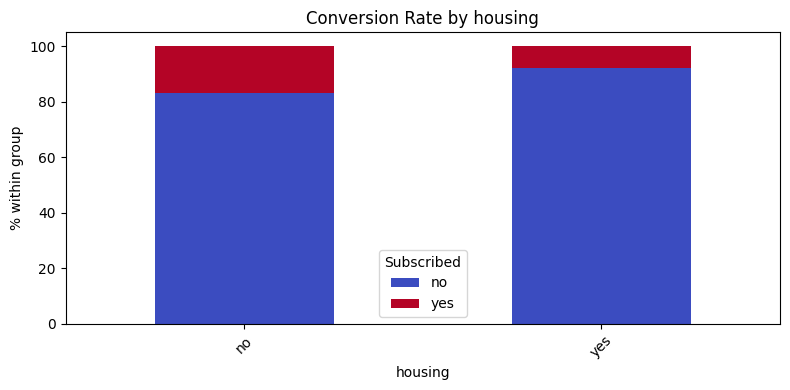

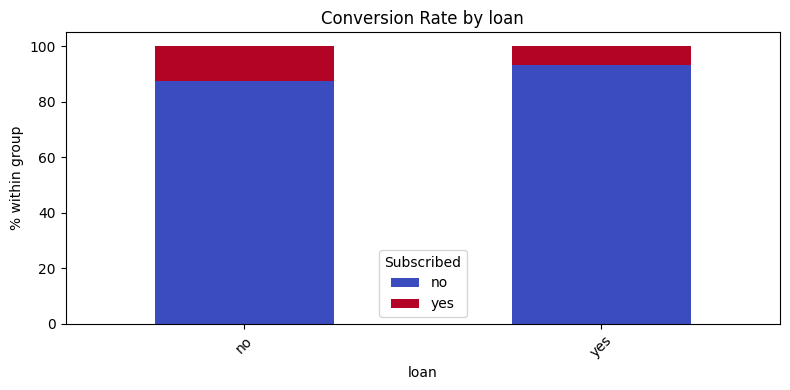

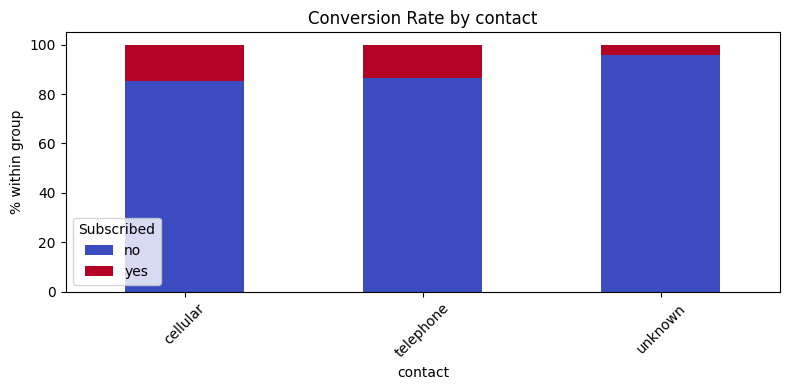

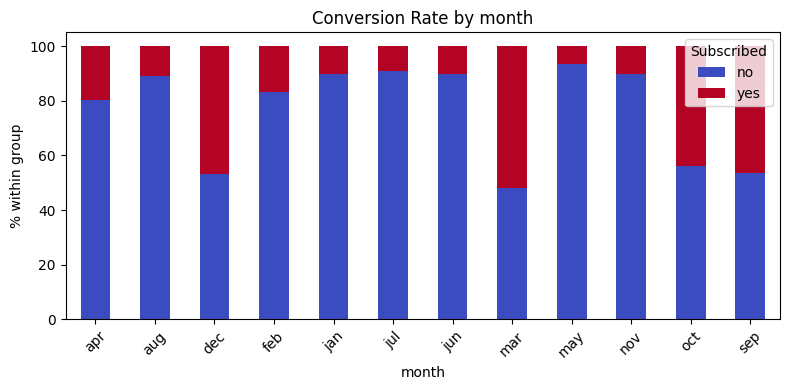

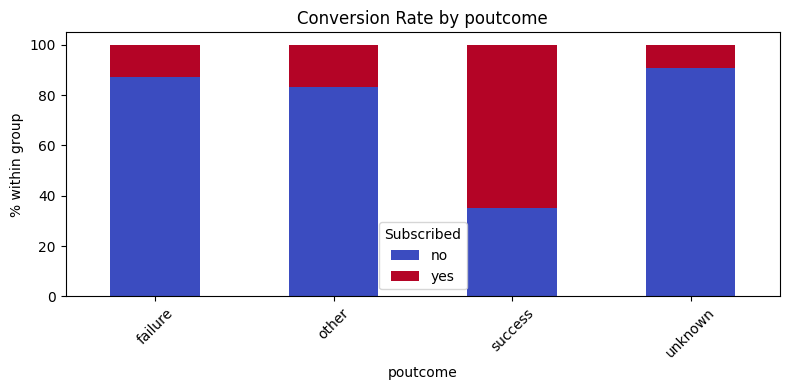

In [11]:
# Calculate conversion rates

for col in categorical_cols:
    conv_rate = pd.crosstab(df[col], df['y'], normalize='index') * 100
    conv_rate.plot(kind='bar', stacked=True, figsize=(8, 4), colormap='coolwarm')
    plt.title(f'Conversion Rate by {col}')
    plt.ylabel('% within group')
    plt.xticks(rotation=45)
    plt.legend(title='Subscribed')
    plt.tight_layout()
    plt.savefig(f'..\images\Conversion_rate_by_{col}')
    plt.show()

# Statistical Tests

In [12]:
# Filter relevant groups
ab_test_df = df[df['contact'].isin(['cellular', 'telephone'])]

# Grouped conversion rates
ab_summary = pd.crosstab(ab_test_df['contact'], ab_test_df['y']) * 100
print(ab_summary)


y               no     yes
contact                   
cellular   2491600  436900
telephone   251600   39000


In [13]:
# Performing a two-proportion Z-test

from statsmodels.stats.proportion import proportions_ztest

# Conversion counts
conversions = ab_summary['yes'].values  # yes counts
visitors = ab_summary.sum(axis=1).values  # total per group

# Run Z-test
z_stat, p_val = proportions_ztest(count=conversions, nobs=visitors)

print(f"Z-statistic: {z_stat:.3f}")
print(f"P-value: {p_val:.5f}")

if p_val < 0.05:
    print("✅ Statistically significant difference in conversion rates.")
else:
    print("❌ No statistically significant difference.")


Z-statistic: 21.706
P-value: 0.00000
✅ Statistically significant difference in conversion rates.


In [ ]:
from scipy.stats import chi2_contingency

# Create contingency table
contingency = pd.crosstab(ab_test_df['contact'], ab_test_df['y'])

# Perform chi-squared test
chi2, p_val, dof, ex = chi2_contingency(contingency)

print(f"Chi-squared Statistic: {chi2:.3f}")
print(f"P-value: {p_val:.4f}")

# Since p-value is less than 0.05, we will reject the null hypothesis

Chi-squared Statistic: 4.593
P-value: 0.0321


In [13]:
# Convert 'y' to binary: yes → 1, no → 0
df['y'] = df['y'].map({'yes': 1, 'no': 0})


In [14]:
# One-hot encode all object (categorical) columns
df_encoded = pd.get_dummies(df, drop_first=True)
df_encoded.head()


,age,balance,day,duration,campaign,pdays,previous,y,job_blue-collar,job_entrepreneur,...,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_other,poutcome_success,poutcome_unknown
0,58,2143,5,261,1,-1,0,0,False,False,...,False,False,False,True,False,False,False,False,False,True
1,44,29,5,151,1,-1,0,0,False,False,...,False,False,False,True,False,False,False,False,False,True
2,33,2,5,76,1,-1,0,0,False,True,...,False,False,False,True,False,False,False,False,False,True
3,47,1506,5,92,1,-1,0,0,True,False,...,False,False,False,True,False,False,False,False,False,True
4,33,1,5,198,1,-1,0,0,False,False,...,False,False,False,True,False,False,False,False,False,True


In [15]:
df_encoded.shape

(45211, 43)

In [16]:
# Define X and y

X = df_encoded.drop('y', axis=1)
y = df_encoded['y']


In [17]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y)


In [18]:
from sklearn.preprocessing import StandardScaler


scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


# Model Building

### Logistic Regression 

In [19]:
from sklearn.linear_model import LogisticRegression

model_1 = LogisticRegression(class_weight='balanced')
model_1.fit(X_train_scaled, y_train)


,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,'balanced'
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [20]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

y_pred = model_1.predict(X_test_scaled)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.8459581997124848
Precision: 0.41857073407875545
Recall: 0.8137996219281664
F1 Score: 0.5528089887640449

Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.85      0.91      7985
           1       0.42      0.81      0.55      1058

    accuracy                           0.85      9043
   macro avg       0.70      0.83      0.73      9043
weighted avg       0.91      0.85      0.87      9043



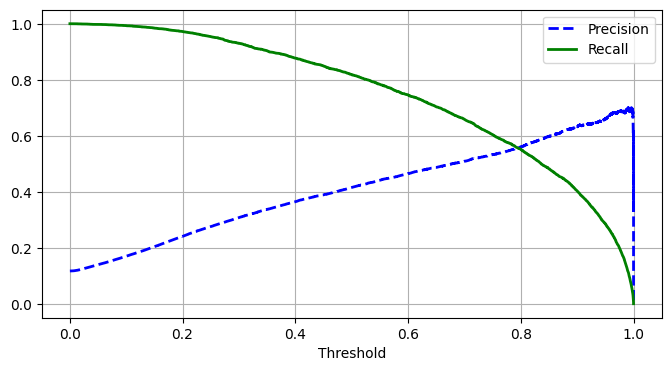

In [21]:
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import precision_recall_curve


y_scores = cross_val_predict(model_1, X_train_scaled, y_train, cv = 3, method='predict_proba')[:,1]
precisions, recalls, thresholds = precision_recall_curve(y_train, y_scores)
plt.figure(figsize=(8, 4)) 
plt.plot(thresholds, precisions[:-1], "b--", label="Precision", linewidth=2)
plt.plot(thresholds, recalls[:-1], "g-", label="Recall", linewidth=2)
plt.grid()
plt.xlabel("Threshold")
plt.legend()
plt.show()

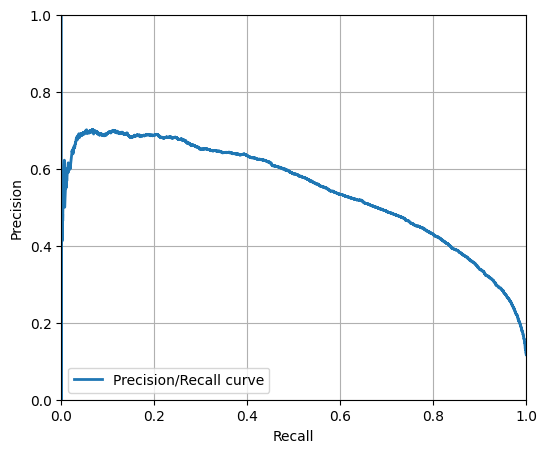

In [22]:
plt.figure(figsize=(6, 5)) 
plt.plot(recalls, precisions, linewidth=2, label="Precision/Recall curve")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.axis([0, 1, 0, 1])
plt.grid()
plt.legend(loc="lower left")
plt.show()

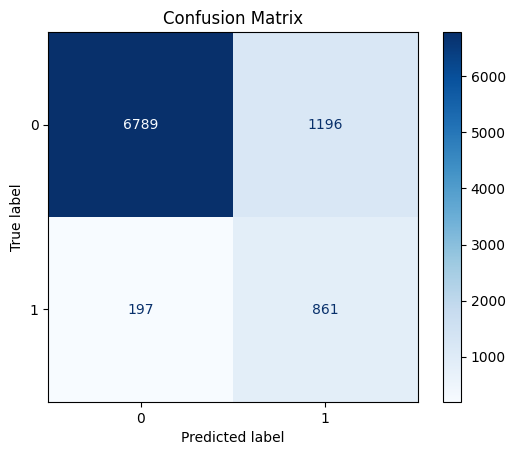

In [23]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_estimator(model_1, X_test_scaled, y_test, cmap='Blues')
plt.title('Confusion Matrix')
plt.savefig('../images/logistic_regression_confusion_matrix.png')
plt.show()


### SVM

In [24]:
from sklearn.svm import SVC

model_2 = SVC(probability=True, class_weight='balanced')
model_2.fit(X_train_scaled, y_train)


,C,1.0
,kernel,'rbf'
,degree,3
,gamma,'scale'
,coef0,0.0
,shrinking,True
,probability,True
,tol,0.001
,cache_size,200
,class_weight,'balanced'
,verbose,False


In [25]:
y_pred = model_2.predict(X_test_scaled)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.8492756828486122
Precision: 0.42706838833094213
Recall: 0.8440453686200378
F1 Score: 0.5671641791044776

Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.85      0.91      7985
           1       0.43      0.84      0.57      1058

    accuracy                           0.85      9043
   macro avg       0.70      0.85      0.74      9043
weighted avg       0.91      0.85      0.87      9043



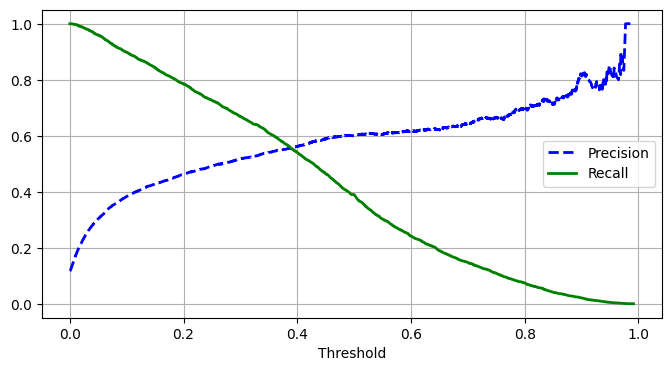

In [26]:
y_scores = cross_val_predict(model_2, X_train_scaled, y_train, cv = 3, method='predict_proba')[:,1]
precisions, recalls, thresholds = precision_recall_curve(y_train, y_scores)
plt.figure(figsize=(8, 4)) 
plt.plot(thresholds, precisions[:-1], "b--", label="Precision", linewidth=2)
plt.plot(thresholds, recalls[:-1], "g-", label="Recall", linewidth=2)
plt.grid()
plt.xlabel("Threshold")
plt.legend()
plt.show()

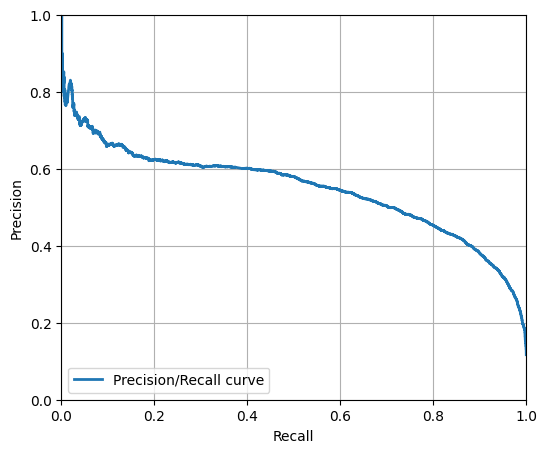

In [27]:
plt.figure(figsize=(6, 5)) 
plt.plot(recalls, precisions, linewidth=2, label="Precision/Recall curve")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.axis([0, 1, 0, 1])
plt.grid()
plt.legend(loc="lower left")
plt.show()

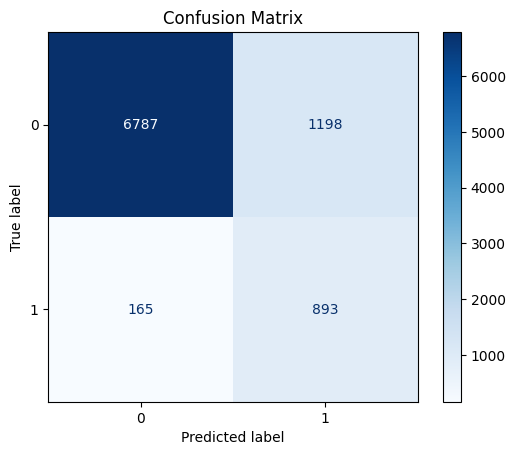

In [28]:
ConfusionMatrixDisplay.from_estimator(model_2, X_test_scaled, y_test, cmap='Blues')
plt.title('Confusion Matrix')
plt.savefig('../images/SVC_confusion_matrix.png')
plt.show()

### Random Forest

In [29]:
from sklearn.ensemble import RandomForestClassifier

model_3 = RandomForestClassifier(class_weight='balanced')
model_3.fit(X_train_scaled, y_train)

,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [30]:
y_pred = model_3.predict(X_test_scaled)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.9039035718235099
Precision: 0.6842105263157895
Recall: 0.33175803402646503
F1 Score: 0.4468491406747295

Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.98      0.95      7985
           1       0.68      0.33      0.45      1058

    accuracy                           0.90      9043
   macro avg       0.80      0.66      0.70      9043
weighted avg       0.89      0.90      0.89      9043



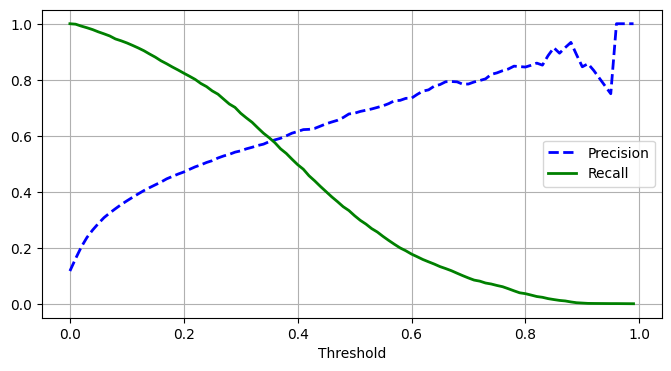

In [31]:
y_scores = cross_val_predict(model_3, X_train_scaled, y_train, cv = 3, method='predict_proba')[:,1]
precisions, recalls, thresholds = precision_recall_curve(y_train, y_scores)
plt.figure(figsize=(8, 4)) 
plt.plot(thresholds, precisions[:-1], "b--", label="Precision", linewidth=2)
plt.plot(thresholds, recalls[:-1], "g-", label="Recall", linewidth=2)
plt.grid()
plt.xlabel("Threshold")
plt.legend()
plt.show()

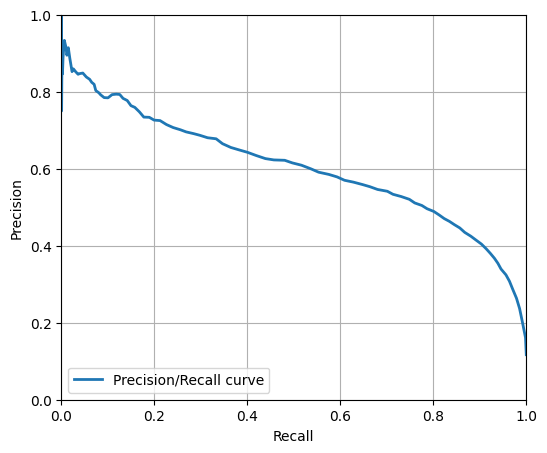

In [32]:
plt.figure(figsize=(6, 5)) 
plt.plot(recalls, precisions, linewidth=2, label="Precision/Recall curve")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.axis([0, 1, 0, 1])
plt.grid()
plt.legend(loc="lower left")
plt.show()

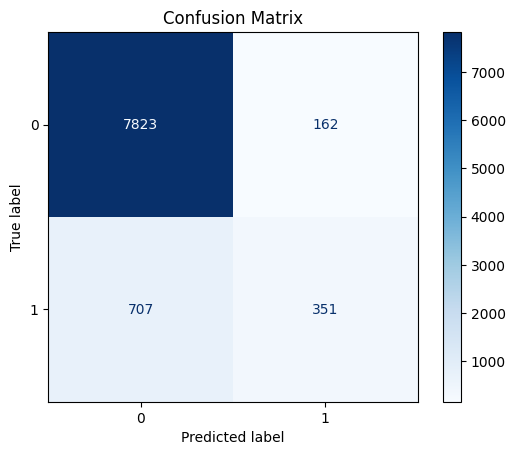

In [33]:
ConfusionMatrixDisplay.from_estimator(model_3, X_test_scaled, y_test, cmap='Blues')
plt.title('Confusion Matrix')
plt.savefig('../images/Random_forest_confusion_matrix.png')
plt.show()

### Gradient Boost

In [34]:
from sklearn.ensemble import GradientBoostingClassifier

model_4 = GradientBoostingClassifier()
model_4.fit(X_train_scaled, y_train)

,loss,'log_loss'
,learning_rate,0.1
,n_estimators,100
,subsample,1.0
,criterion,'friedman_mse'
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_depth,3
,min_impurity_decrease,0.0
,init,None


In [35]:
y_pred = model_4.predict(X_test_scaled)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.9042353201371226
Precision: 0.6454545454545455
Recall: 0.40264650283553877
F1 Score: 0.4959254947613504

Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.97      0.95      7985
           1       0.65      0.40      0.50      1058

    accuracy                           0.90      9043
   macro avg       0.79      0.69      0.72      9043
weighted avg       0.89      0.90      0.89      9043



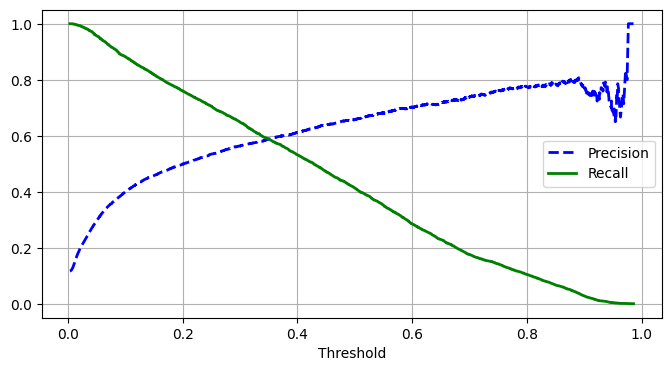

In [36]:
y_scores = cross_val_predict(model_4, X_train_scaled, y_train, cv = 3, method='predict_proba')[:,1]
precisions, recalls, thresholds = precision_recall_curve(y_train, y_scores)
plt.figure(figsize=(8, 4)) 
plt.plot(thresholds, precisions[:-1], "b--", label="Precision", linewidth=2)
plt.plot(thresholds, recalls[:-1], "g-", label="Recall", linewidth=2)
plt.grid()
plt.xlabel("Threshold")
plt.legend()
plt.show()

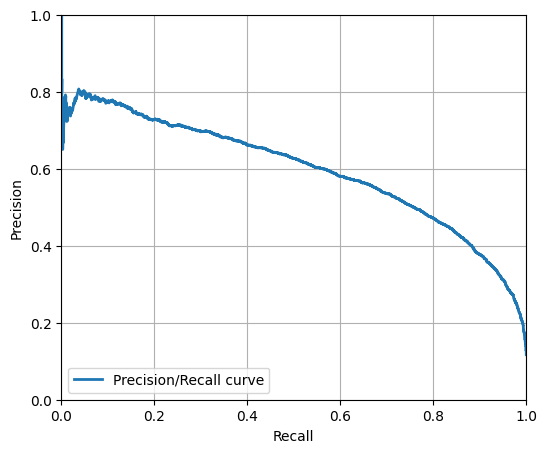

In [37]:
plt.figure(figsize=(6, 5)) 
plt.plot(recalls, precisions, linewidth=2, label="Precision/Recall curve")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.axis([0, 1, 0, 1])
plt.grid()
plt.legend(loc="lower left")
plt.show()

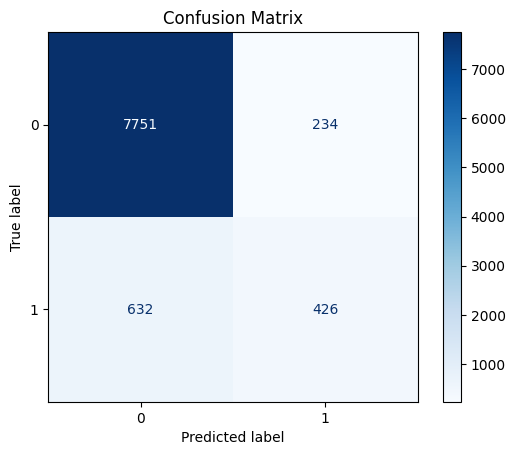

In [38]:
ConfusionMatrixDisplay.from_estimator(model_4, X_test_scaled, y_test, cmap='Blues')
plt.title('Confusion Matrix')
plt.savefig('../images/GBDT_confusion_matrix.png')
plt.show()

### XGB Classifier

In [39]:
from xgboost import XGBClassifier

model_5 = XGBClassifier(
    scale_pos_weight=9.0,
    eval_metric='aucpr',   # Better for imbalance
    use_label_encoder=False,
    random_state=42
)

model_5.fit(X_train_scaled, y_train)

,objective,'binary:logistic'
,base_score,None
,booster,None
,callbacks,None
,colsample_bylevel,None
,colsample_bynode,None
,colsample_bytree,None
,device,None
,early_stopping_rounds,None
,enable_categorical,False
,eval_metric,'aucpr'


In [40]:
y_pred = model_5.predict(X_test_scaled)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.8679641711821299
Precision: 0.4638682252922423
Recall: 0.8251417769376181
F1 Score: 0.5938775510204082

Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.87      0.92      7985
           1       0.46      0.83      0.59      1058

    accuracy                           0.87      9043
   macro avg       0.72      0.85      0.76      9043
weighted avg       0.91      0.87      0.88      9043



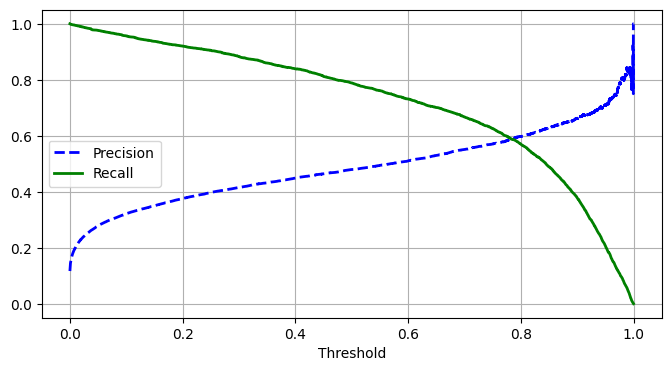

In [41]:
y_scores = cross_val_predict(model_5, X_train_scaled, y_train, cv = 3, method='predict_proba')[:,1]
precisions, recalls, thresholds = precision_recall_curve(y_train, y_scores)
plt.figure(figsize=(8, 4)) 
plt.plot(thresholds, precisions[:-1], "b--", label="Precision", linewidth=2)
plt.plot(thresholds, recalls[:-1], "g-", label="Recall", linewidth=2)
plt.grid()
plt.xlabel("Threshold")
plt.legend()
plt.show()

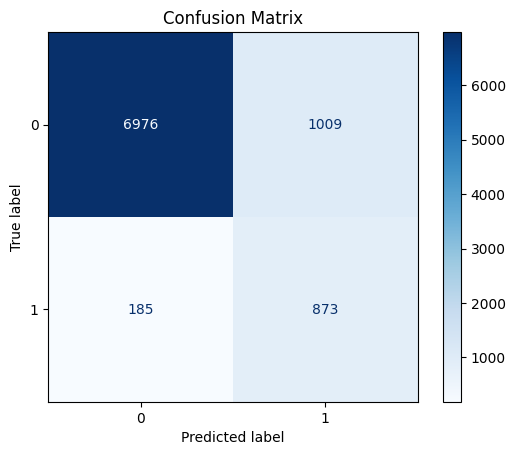

In [42]:
ConfusionMatrixDisplay.from_estimator(model_5, X_test_scaled, y_test, cmap='Blues')
plt.title('Confusion Matrix')
plt.savefig('../images/logistic_regression_confusion_matrix.png')
plt.show()


### Decision Tree Classifier

In [43]:
from sklearn.tree import DecisionTreeClassifier

model_6 = DecisionTreeClassifier()
model_6.fit(X_train_scaled, y_train)

,criterion,'gini'
,splitter,'best'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,None
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


In [ ]:
y_pred = model_6.predict(X_test_scaled)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))



Accuracy: 0.8761472962512441
Precision: 0.4720216606498195
Recall: 0.4943289224952741
F1 Score: 0.48291782086795937

Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.93      0.93      7985
           1       0.47      0.49      0.48      1058

    accuracy                           0.88      9043
   macro avg       0.70      0.71      0.71      9043
weighted avg       0.88      0.88      0.88      9043



Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1 Score: 1.0

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     31937
           1       1.00      1.00      1.00      4231

    accuracy                           1.00     36168
   macro avg       1.00      1.00      1.00     36168
weighted avg       1.00      1.00      1.00     36168



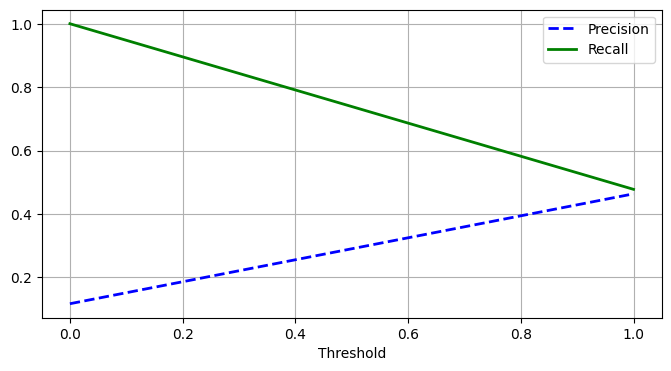

In [45]:
y_scores = cross_val_predict(model_6, X_train_scaled, y_train, cv = 3, method='predict_proba')[:,1]
precisions, recalls, thresholds = precision_recall_curve(y_train, y_scores)
plt.figure(figsize=(8, 4)) 
plt.plot(thresholds, precisions[:-1], "b--", label="Precision", linewidth=2)
plt.plot(thresholds, recalls[:-1], "g-", label="Recall", linewidth=2)
plt.grid()
plt.xlabel("Threshold")
plt.legend()
plt.show()

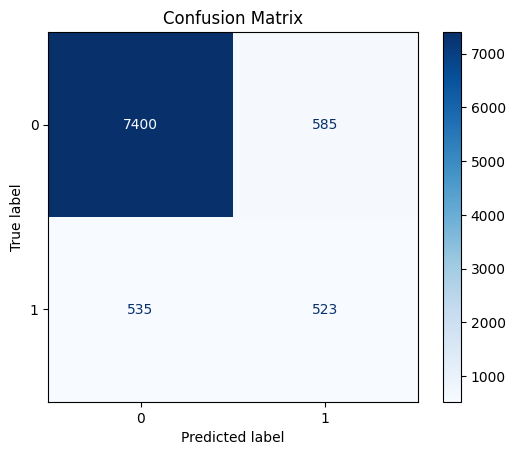

In [46]:
ConfusionMatrixDisplay.from_estimator(model_6, X_test_scaled, y_test, cmap='Blues')
plt.title('Confusion Matrix')
plt.savefig('../images/logistic_regression_confusion_matrix.png')
plt.show()

### Voting Classifier

In [48]:
from sklearn.ensemble import VotingClassifier

estimators = [('lr', model_1), 
              ('svc', model_2),
              ('rf', model_3),
              ('gbdt', model_4),
              ('xgb', model_5),
              ('dt', model_6) ]

FINAL_MODEL = VotingClassifier(estimators=estimators)

FINAL_MODEL.fit(X_train_scaled, y_train)

,estimators,"[('lr', ...), ('svc', ...), ...]"
,voting,'hard'
,weights,None
,n_jobs,None
,flatten_transform,True
,verbose,False
,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True


In [49]:
y_pred = FINAL_MODEL.predict(X_test_scaled)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

y_pred_train = FINAL_MODEL.predict(X_train_scaled)

print()
print()

print("Accuracy:", accuracy_score(y_train, y_pred_train))
print("Precision:", precision_score(y_train, y_pred_train))
print("Recall:", recall_score(y_train, y_pred_train))
print("F1 Score:", f1_score(y_train, y_pred_train))
print("\nClassification Report:\n", classification_report(y_train, y_pred_train))


Accuracy: 0.9027977441114674
Precision: 0.5888778550148958
Recall: 0.5604914933837429
F1 Score: 0.5743341404358353

Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.95      0.95      7985
           1       0.59      0.56      0.57      1058

    accuracy                           0.90      9043
   macro avg       0.77      0.75      0.76      9043
weighted avg       0.90      0.90      0.90      9043



Accuracy: 0.9742866622428666
Precision: 0.8548699204472157
Recall: 0.9397305601512644
F1 Score: 0.8952938527358703

Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.98      0.99     31937
           1       0.85      0.94      0.90      4231

    accuracy                           0.97     36168
   macro avg       0.92      0.96      0.94     36168
weighted avg       0.98      0.97      0.97     36168



### Extract Feature Importance from Logistic Regression Coefficients

In [59]:
import numpy as np

# Get feature names
feature_names = X.columns

# Get model coefficients
coefficients = model_1.coef_[0]

# Create a DataFrame of feature importance
feature_importance = pd.DataFrame({
    'Feature': feature_names,
    'Coefficient': coefficients
})

# Sort by absolute value of coefficients
feature_importance['Abs_Coefficient'] = feature_importance['Coefficient'].abs()
feature_importance = feature_importance.sort_values(by='Abs_Coefficient', ascending=False)

feature_importance.head(10)


,Feature,Coefficient,Abs_Coefficient
3,duration,1.526409,1.526409
27,contact_unknown,-0.733499,0.733499
40,poutcome_success,0.451346,0.451346
32,month_jul,-0.402798,0.402798
24,housing_yes,-0.384133,0.384133
35,month_may,-0.355000,0.355000
28,month_aug,-0.328285,0.328285
36,month_nov,-0.289399,0.289399
4,campaign,-0.278326,0.278326
31,month_jan,-0.234466,0.234466


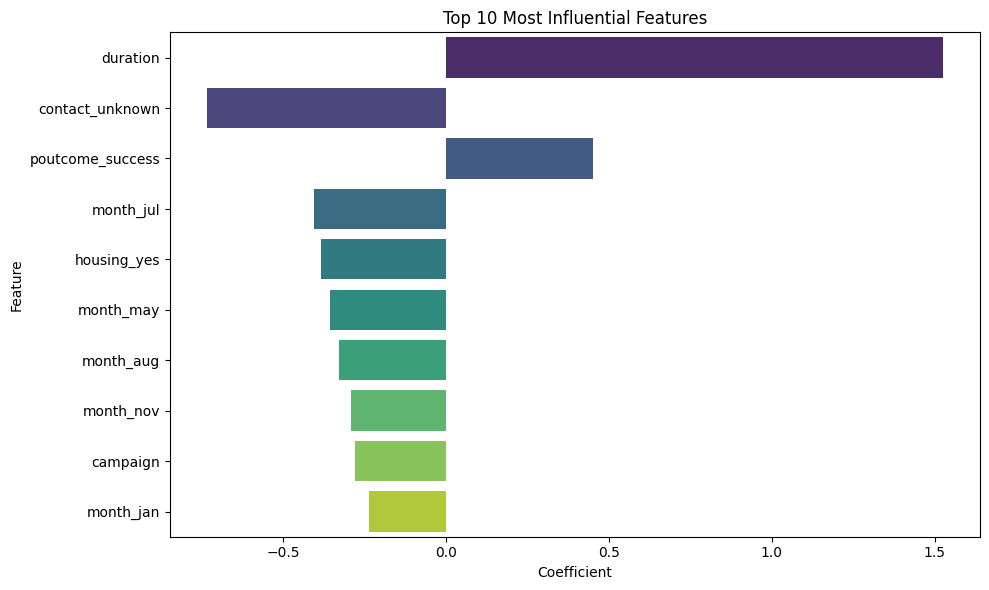

In [60]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Coefficient', y='Feature', data=feature_importance.head(10), palette='viridis')
plt.title('Top 10 Most Influential Features')
plt.tight_layout()
plt.savefig('../images/feature_importance_logreg.png')  # Save to /images
plt.show()


In [61]:
from sklearn.model_selection import cross_val_score

# Use F1-score for imbalanced classification
cv_f1 = cross_val_score(model_1, X, y, cv=5, scoring='f1')

print("F1 scores from 5-fold CV:", cv_f1)
print("Mean F1 Score:", round(cv_f1.mean(), 4))


F1 scores from 5-fold CV: [0.72381794 0.42429907 0.30812085 0.35884244 0.38628011]
Mean F1 Score: 0.4403


In [63]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer, f1_score, recall_score

# Custom scorer
f1 = make_scorer(f1_score)
recall = make_scorer(recall_score)

param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10],
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear']
}

grid_search = GridSearchCV(model_1, param_grid, cv=5, scoring=recall)
grid_search.fit(X, y)

print("Best parameters:", grid_search.best_params_)
print("Best cross-validated recall Score:", round(grid_search.best_score_, 4))


Best parameters: {'C': 0.001, 'penalty': 'l2', 'solver': 'liblinear'}
Best cross-validated recall Score: 0.7576


In [57]:
from sklearn.metrics import classification_report, confusion_matrix

best_model = grid_search.best_estimator_
best_model.fit(X, y)

y_pred = best_model.predict(X)

print("Classification Report:\n")
print(classification_report(y, y_pred, digits=4))

print("Confusion Matrix:")
print(confusion_matrix(y, y_pred))


Classification Report:

              precision    recall  f1-score   support

           0     0.9696    0.8310    0.8950     39922
           1     0.3864    0.8034    0.5218      5289

    accuracy                         0.8278     45211
   macro avg     0.6780    0.8172    0.7084     45211
weighted avg     0.9014    0.8278    0.8513     45211

Confusion Matrix:
[[33175  6747]
 [ 1040  4249]]


In [ ]:


y_pred = model_1.predict(X_test_scaled)
y_proba = model_1.predict_proba(X_test_scaled)[:, 1]  # Probability of class 'yes'

# Exporting predictions
final_output = pd.DataFrame({
    'Client_ID': X_test.index,
    'Predicted_Response': y_pred,
    'Probability_of_Subscription': y_proba
})

final_output.to_csv('outputs/final_marketing_predictions.csv', index=False)
print("✅ Predictions saved to outputs/final_marketing_predictions.csv")


In [65]:
import joblib

# Save model
joblib.dump(model_1, '..\models\model.pkl')

# Save scaler (if used)
joblib.dump(scaler, '..\models\scaler.pkl')


['..\\models\\scaler.pkl']